In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [2]:
rounddf=pd.read_csv("round.csv")
userround=pd.read_csv("userround.csv")
display(rounddf)

,id,num_round,start_pot,end_pot,start_time,end_time,session_id
0,1,1,120,102,2015-12-12 11:15:35.868141,2015-12-12 11:15:47.496505,1
1,2,2,102,82,2015-12-12 11:16:02.496505,2015-12-12 11:16:13.482420,1
2,3,3,82,61,2015-12-12 11:16:28.482420,2015-12-12 11:16:40.223503,1
3,4,4,61,49,2015-12-12 11:16:55.223503,2015-12-12 11:17:07.851955,1
4,5,5,49,36,2015-12-12 11:17:22.851955,2015-12-12 11:17:33.835103,1
5,6,6,36,21,2015-12-12 11:17:48.835103,2015-12-12 11:18:03.103477,1
6,7,7,21,8,2015-12-12 11:18:18.103477,2015-12-12 11:18:27.032402,1
7,8,8,8,1,2015-12-12 11:18:42.032402,2015-12-12 11:18:53.585914,1
8,9,9,1,-5,2015-12-12 11:19:08.585914,2015-12-12 11:19:13.116412,1
9,10,10,-5,-11,2015-12-12 11:19:28.116412,2015-12-12 11:19:36.610234,1


In [4]:
# games with odd and even options (0,1,2,3,4) and with only even options (0,2,4)
oddity=[0 for i in range(max(rounddf["session_id"]))]
for k in range(max(rounddf["session_id"])):
    for i in range(len(userround)):
        if ((userround.loc[i,"round_id"]-1)//10==k and userround.loc[i,"has_seleced"]==1):
            oddity[k]+=int(userround.loc[i,"option_selected"])%2
print(oddity)

[19, 23, 23, 26, 26, 28, 22, 19, 15, 20, 21, 9, 13, 30, 22, 22, 13, 26, 18, 22, 28, 32, 15, 15, 17, 27, 14, 17, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17]


In [5]:
# contributions for each player and round for a given game
def optionmatrix(game):
    OM=[[2 for i in range(6)] for j in range(10)]
    for j in range(10):
        for i in range(6):
            OM[j][i]=userround.loc[60*game+j*6+i,"option_selected"]
    return OM
display(optionmatrix(53))

[[4, 2, 2, 0, 3, 2],
 [4, 3, 2, 0, 2, 2],
 [4, 2, 2, 2, 4, 4],
 [4, 2, 2, 4, 3, 4],
 [4, 2, 1, 4, 3, 2],
 [0, 2, 1, 2, 2, 3],
 [0, 2, 1, 2, 2, 3],
 [0, 3, 1, 1, 1, 2],
 [0, 3, 1, 1, 1, 0],
 [0, 2, 2, 2, 2, 0]]

In [6]:
# transition matrix for a given round using all non-odd games
def transitionmatrix(round_):
    # W[a(fila)][b(columna)]=prob(estat(t)=a|estat(t-1)=b)=w(b->a)
    # W=[[w(0->0),w(2->0),w(4->0)],
    #    [w(0->2),w(2->2),w(4->2)],
    #    [w(0->4),w(2->4),w(4->4)]]
    W=[[0.0 for i in range(3)] for j in range(3)]
    for i in range(3):
        counter=0
        for k in range(max(userround["round_id"])//10):
            if(oddity[k]==0):
                OM=optionmatrix(k)
                for n in range(6):
                    if (OM[round_-1][n]==2*i):
                        W[(OM[round_][n])//2][i]+=1.0
                        counter+=1
        for j in range(3):
            W[j][i]=W[j][i]/counter
    return W
for t in range(1,10):
    print(str(t)+"-"+str(t+1)+":")
    for i in range(3):
        print(transitionmatrix(t)[i])

1-2:
[0.2222222222222222, 0.10344827586206896, 0.041666666666666664]
[0.7777777777777778, 0.4482758620689655, 0.3958333333333333]
[0.0, 0.4482758620689655, 0.5625]
2-3:
[0.3076923076923077, 0.18461538461538463, 0.12121212121212122]
[0.46153846153846156, 0.46153846153846156, 0.30303030303030304]
[0.23076923076923078, 0.35384615384615387, 0.5757575757575758]
3-4:
[0.2916666666666667, 0.19642857142857142, 0.15625]
[0.5, 0.4642857142857143, 0.359375]
[0.20833333333333334, 0.3392857142857143, 0.484375]
4-5:
[0.17857142857142858, 0.19672131147540983, 0.09090909090909091]
[0.6428571428571429, 0.4426229508196721, 0.41818181818181815]
[0.17857142857142858, 0.36065573770491804, 0.4909090909090909]
5-6:
[0.09090909090909091, 0.3088235294117647, 0.14814814814814814]
[0.6818181818181818, 0.4117647058823529, 0.37037037037037035]
[0.22727272727272727, 0.27941176470588236, 0.48148148148148145]
6-7:
[0.45161290322580644, 0.23809523809523808, 0.1]
[0.41935483870967744, 0.5873015873015873, 0.4]
[0.129032

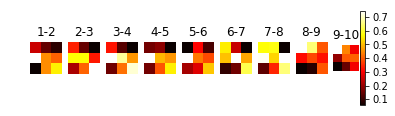

In [7]:
# heatmap of transition matrix components for each round
for t in range(1,10):
    plt.subplot(1,9,t)
    plt.imshow(transitionmatrix(t), cmap='hot', interpolation='nearest')
    plt.axis('off')
    plt.title(str(t)+"-"+str(t+1))
plt.colorbar()
plt.show()

eigvals round 1-2: [-0.04993527  0.28293335  1.        ]
eigvects [[ 0.21140515  0.30420456  0.13012064]
 [-0.78869664  0.50409487  0.6925147 ]
 [ 0.57729149 -0.80829942  0.70957171]]
1st eigvect: [ 0.08492366412213738 0.45197201017811706 0.4631043256997456 ] sum of components: 1.0
eigvals round 2-3: [1.         0.0712739  0.27371444]
eigvects [[-0.29572213 -0.44859785 -0.34223844]
 [-0.64831391  0.81512037 -0.47087349]
 [-0.70159639 -0.36652252  0.81311193]]
1st eigvect: [ 0.179701206869052 0.3939603381359988 0.42633845499494916 ] sum of components: 1.0
eigvals round 3-4: [1.         0.04346451 0.19686287]
eigvects [[-0.33386442 -0.3558271  -0.32048084]
 [-0.71985113  0.81434132 -0.49012027]
 [-0.60856299 -0.45851422  0.81060111]]
1st eigvect: [ 0.20084745762711861 0.43305084745762706 0.3661016949152542 ] sum of components: 0.9999999999999998
eigvals round 4-5: [ 1.         -0.10134148  0.21344495]
eigvects [[-0.24726196 -0.45602145 -0.37258364]
 [-0.74762688  0.81455427 -0.44290296]


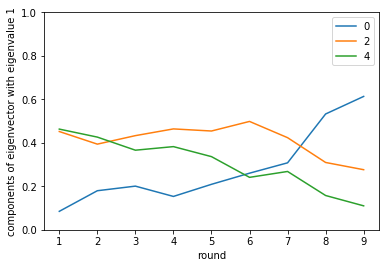

In [8]:
# 1st eigvect as a function of round
l=[0.0 for i in range(3)]
e=[[0.0 for i in range(3)] for i in range(3)]
e0=[0.0 for i in range(1,10)]
e1=[0.0 for i in range(1,10)]
e2=[0.0 for i in range(1,10)]
for t in range(9):
    M=np.array(transitionmatrix(t+1))
    l,e=np.linalg.eig(M)
    print("eigvals round "+str(t+1)+"-"+str(t+2)+":",l)
    print("eigvects",e)
    n=np.argmax(l)
    e0[t]=np.real(e[0][n])
    e1[t]=np.real(e[1][n])
    e2[t]=np.real(e[2][n])
    const=np.sqrt(e0[t]*e0[t]+e1[t]*e1[t]+e2[t]*e2[t])/(e0[t]+e1[t]+e2[t])
    e0[t]=e0[t]*const
    e1[t]=e1[t]*const
    e2[t]=e2[t]*const
    print("1st eigvect: [",e0[t],e1[t],e2[t],"]","sum of components:",e0[t]+e1[t]+e2[t])
plt.plot(list(range(1,10)),e0,label="0")
plt.plot(list(range(1,10)),e1,label="2")
plt.plot(list(range(1,10)),e2,label="4")
plt.ylim(0,1)
plt.xlabel("round")
plt.ylabel("components of eigenvector with eigenvalue 1")
plt.legend()
plt.show()

In [9]:
# Caldria calcular la variància dels valors obtinguts per saber si el resultat és significatiu, però no sé com fer-ho

round: 1-2 eigvals: [-0.04993527  0.28293335  1.        ]
2nd eigval: 0.28293335144287274 , 2nd eigvect:[ 0.30420455621284137 0.5040948652769612 -0.8082994214898033 ]
round: 2-3 eigvals: [1.         0.0712739  0.27371444]
2nd eigval: 0.27371444275994483 , 2nd eigvect:[ -0.342238440214462 -0.47087348820780817 0.8131119284222705 ]
round: 3-4 eigvals: [1.         0.04346451 0.19686287]
2nd eigval: 0.19686287489043366 , 2nd eigvect:[ -0.320480837261459 -0.49012026953480353 0.8106011067962625 ]
round: 4-5 eigvals: [ 1.         -0.10134148  0.21344495]
2nd eigval: 0.21344495356036192 , 2nd eigvect:[ -0.37258364443099123 -0.44290295758396414 0.8154866020149552 ]
round: 5-6 eigvals: [ 1.         -0.23699469  0.22114997]
2nd eigval: 0.22114996917545118 , 2nd eigvect:[ -0.2952800519499653 -0.5116074754918936 0.8068875274418592 ]
round: 6-7 eigvals: [1.         0.17238839 0.3665261 ]
2nd eigval: 0.3665261032723031 , 2nd eigvect:[ -0.668256203128244 -0.07216641628649739 0.7404226194147413 ]
round:

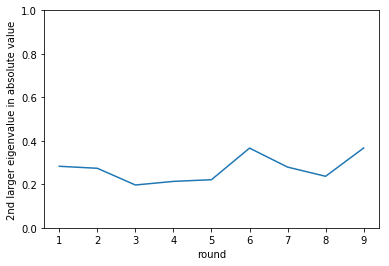

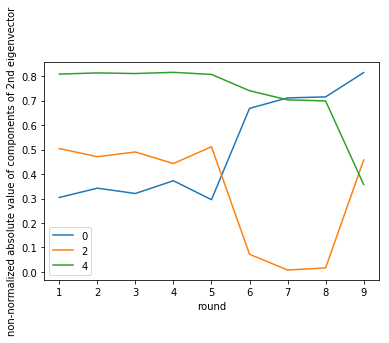

In [10]:
# 2nd eigval and eigvect as a function of round
l=[0.0 for i in range(3)]
e=[[0.0 for i in range(3)] for i in range(3)]
e0=[0.0 for i in range(1,10)]
e1=[0.0 for i in range(1,10)]
e2=[0.0 for i in range(1,10)]
l2=[0.0 for i in range(1,10)]
for t in range(9):
    M=np.array(transitionmatrix(t+1))
    l,e=np.linalg.eig(M)
    m=np.argmax(l)
    n=np.argmin(l)
    l2[t]=l[(-m-n)%3]
    print("round:",str(t+1)+"-"+str(t+2),"eigvals:",l)
    e0[t]=(e[0][(-m-n)%3])
    e1[t]=(e[1][(-m-n)%3])
    e2[t]=(e[2][(-m-n)%3])
    print("2nd eigval:",np.abs(l2[t]),", 2nd eigvect:[",e0[t],e1[t],e2[t],"]")
plt.plot(list(range(1,10)),np.abs(l2))
plt.xlabel("round")
plt.ylabel("2nd larger eigenvalue in absolute value")
plt.ylim(0,1)
plt.show()
plt.plot(list(range(1,10)),np.abs(e0),label="0")
plt.plot(list(range(1,10)),np.abs(e1),label="2")
plt.plot(list(range(1,10)),np.abs(e2),label="4")
plt.xlabel("round")
plt.ylabel("non-normalized absolute value of components of 2nd eigenvector")
plt.legend()
plt.show()

In [11]:
# Del segon gràfic no veig que es pugui treure gaire informació, però del primer, com que el segon eigenvalue està relacionat
# amb el ritme de decaïment respecte l'estat en equilibri es pot interpretar com una mesura del canvi d'opinió: un temps de
# decaïment gran podria indicar que la distribució d'opinions majoritària està tardant més a establir-se, però caldria
# abans contrastar aquesta interpretació amb altres experiments.

# Respecte el 2n gràfic, si es té en compte el 2n eigval més gran sense valor absolut, els resultats semblen més coherents.
# Segurament és perquè si el segon eigval és negatiu el vector va canviant de signe a cada pas de cadena de Markov, i és millor
# ignorar els vectors que fan això encara que decaiguin més lentament, però potser caldria buscar més informació al respecte.

In [19]:
# thresholdround (round on which threshold is reached) for each game and number of games with each thresholdround
thresholdround=[]
for k in range(len(rounddf)):
    pot1=rounddf.loc[k,"start_pot"]
    pot2=rounddf.loc[k,"end_pot"]
    if ((pot1*pot2<0)or((pot1*pot2==0)and(pot1>0 or pot2>0))):
        if (oddity[rounddf.loc[k,"session_id"]-1]==0):
            thresholdround.append(rounddf.loc[k,"num_round"])
        else:
            thresholdround.append(11)
counter=[0.0 for i in range(11)]
for i in range(len(thresholdround)):
    for j in range(11):
        if (thresholdround[i]==j):
            counter[j]+=1.0
print(thresholdround)
print(counter)

[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 7, 8, 9, 10, 10, 10, 8, 9, 10, 8, 8, 8, 10, 8, 10, 9, 9, 8, 9, 8, 8, 9, 10, 10, 11]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 9.0, 6.0, 8.0]


In [14]:
# transition matrix for a given round and game
def tm1game(round_,game):
    # round: 1,...,9; game: 0,...,#games-1(=53) per a opcions parells
    # W[a(fila)][b(columna)]=prob(estat(t)=a|estat(t-1)=b)=w(b->a)
    # W=[[w(0->0),w(2->0),w(4->0)],
    #    [w(0->2),w(2->2),w(4->2)],
    #    [w(0->4),w(2->4),w(4->4)]]
    W=[[0.0 for i in range(3)] for j in range(3)]
    if(oddity[game]==0):
        for i in range(3):
            counter=0
            OM=optionmatrix(game)
            for n in range(6):
                if (OM[round_-1][n]==2*i):
                    W[(OM[round_][n])//2][i]+=1.0
                    counter+=1
            for j in range(3):
                if (W[j][i]!=0.0):
                    W[j][i]=W[j][i]/counter
    return W
for t in range(1,10):
    print(str(t)+"-"+str(t+1)+":")
    for i in range(3):
        print(tm1game(t,30)[i])

1-2:
[0.0, 0.0, 0.0]
[1.0, 0.5, 0.3333333333333333]
[0.0, 0.5, 0.6666666666666666]
2-3:
[0.0, 0.0, 0.0]
[0.0, 0.6666666666666666, 0.6666666666666666]
[0.0, 0.3333333333333333, 0.3333333333333333]
3-4:
[0.0, 0.25, 0.0]
[0.0, 0.75, 0.0]
[0.0, 0.0, 1.0]
4-5:
[0.0, 0.3333333333333333, 0.0]
[1.0, 0.6666666666666666, 0.5]
[0.0, 0.0, 0.5]
5-6:
[0.0, 0.25, 0.0]
[1.0, 0.5, 0.0]
[0.0, 0.25, 1.0]
6-7:
[0.0, 0.3333333333333333, 0.0]
[0.0, 0.3333333333333333, 0.0]
[1.0, 0.3333333333333333, 1.0]
7-8:
[0.0, 1.0, 0.0]
[0.0, 0.0, 0.75]
[1.0, 0.0, 0.25]
8-9:
[1.0, 1.0, 0.5]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.5]
9-10:
[0.8, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.2, 0.0, 1.0]


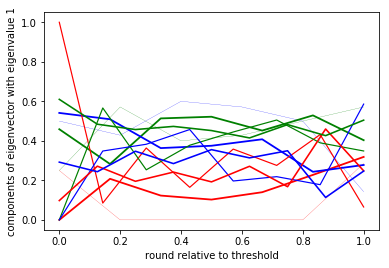

In [20]:
# 1st eigvect as a function of relative round separated by thresholdrounds
l=[0.0 for i in range(3)]
e=[[0.0 for i in range(3)] for i in range(3)]
for i in range(min(thresholdround),11):
    e0=[0.0 for j in range(i-1)]
    e1=[0.0 for j in range(i-1)]
    e2=[0.0 for j in range(i-1)]
    for t in range(i-1):
        M=[[0.0 for j in range(3)] for j in range(3)]
        for k in range(max(userround["round_id"])//10):
            if (oddity[k]==0 and thresholdround[k]==i):
                M+=np.array(tm1game(t+1,k))
        for j in range(3):
            const=M[0][j]+M[1][j]+M[2][j]
            if (const!=0):
                M[0][j]=M[0][j]/const
                M[1][j]=M[1][j]/const
                M[2][j]=M[2][j]/const
            else:
                M[0][j]=1/3
                M[1][j]=1/3
                M[2][j]=1/3
        l,e=np.linalg.eig(M)
        n=np.argmax(l)
        const=np.sqrt(np.real(e[0][n])**2+np.real(e[1][n])**2+np.real(e[2][n])**2)/(np.real(e[0][n]+e[1][n]+e[2][n]))
        e0[t]=np.real(e[0][n])*const
        e1[t]=np.real(e[1][n])*const
        e2[t]=np.real(e[2][n])*const
    relround=list(np.linspace(0,1,i-1))
    plt.plot(relround,e0,"r-",lw=counter[i]/5)
    plt.plot(relround,e1,"g-",lw=counter[i]/5)
    plt.plot(relround,e2,"b-",lw=counter[i]/5)
plt.xlabel("round relative to threshold")
plt.ylabel("components of eigenvector with eigenvalue 1")
plt.show()

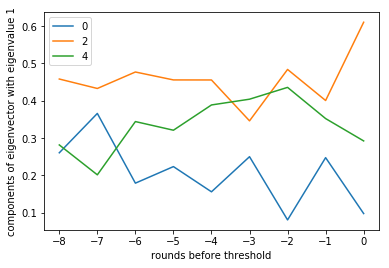

In [21]:
# 1st eigvect as a function of round before threshold
l=[0.0 for i in range(3)]
e=[[0.0 for i in range(3)] for i in range(3)]
e0=[0.0 for i in range(9)]
e1=[0.0 for i in range(9)]
e2=[0.0 for i in range(9)]
for t in range(2,11):
    M=[[0.0 for i in range(3)] for i in range(3)]
    for k in range(max(userround["round_id"])//10):
        if (oddity[k]==0 and t>=12-thresholdround[k]):
            M+=np.array(tm1game(thresholdround[k]-11+t,k))
    for j in range(3):
        const=M[0][j]+M[1][j]+M[2][j]
        if (const!=0):
            M[0][j]=M[0][j]/const
            M[1][j]=M[1][j]/const
            M[2][j]=M[2][j]/const
        else:
            M[0][j]=1/3
            M[1][j]=1/3
            M[2][j]=1/3
    l,e=np.linalg.eig(M)
    n=np.argmax(l)
    const=np.sqrt(np.real(e[0][n])**2+np.real(e[1][n])**2+np.real(e[2][n])**2)/(np.real(e[0][n]+e[1][n]+e[2][n]))
    e0[t-2]=np.real(e[0][n])*const
    e1[t-2]=np.real(e[1][n])*const
    e2[t-2]=np.real(e[2][n])*const
plt.plot([-i for i in range(9)],e0,label="0")
plt.plot([-i for i in range(9)],e1,label="2")
plt.plot([-i for i in range(9)],e2,label="4")
plt.xlabel("rounds before threshold")
plt.ylabel("components of eigenvector with eigenvalue 1")
plt.legend()
plt.show()

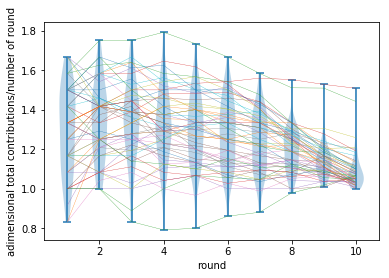

0.7916666666666666 1.7916666666666667


In [3]:
# hurry (total contributions/number of round) as a function of round
hurry=[[] for i in range(10)]
for n in range(len(rounddf)):
    hurry[rounddf.loc[n,"num_round"]-1].append(10*(120-rounddf.loc[n,"end_pot"])/(120*rounddf.loc[n,"num_round"]))
plt.violinplot(hurry)
for n in range(len(rounddf)):
    if (rounddf.loc[n,"num_round"]==1):
        rlzn=[]
    rlzn.append(10*(120-rounddf.loc[n,"end_pot"])/(120*rounddf.loc[n,"num_round"]))
    if (rounddf.loc[n,"num_round"]==10):
        plt.plot([(i+1) for i in range(10)],rlzn,lw=0.3)
plt.xlabel("round")
plt.ylabel("adimensional total contributions/number of round")
plt.show()
print(np.min(hurry),np.max(hurry))

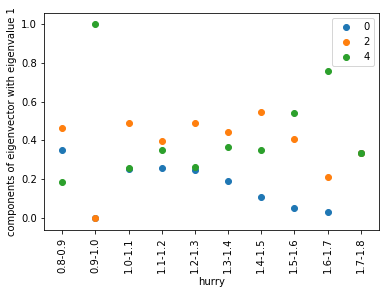

In [57]:
hurry=[]
l=[0.0 for i in range(3)]
e=[[0.0 for i in range(3)] for i in range(3)]
e0=[0.0 for i in range(10)]
e1=[0.0 for i in range(10)]
e2=[0.0 for i in range(10)]
label=["" for i in range(10)]
for n in range(len(rounddf)):
    hurry.append(10*(120-rounddf.loc[n,"end_pot"])/(120*rounddf.loc[n,"num_round"]))
for h in range(10):
    if (h!=0):
        hmin=0.8+0.1*h
    else:
        hmin=0.79
    hmax=0.9+0.1*h
    M=[[0.0 for j in range(3)] for j in range(3)]
    label[h]=str(round(hmin,1))+"-"+str(round(hmax,1))
    for n in range(len(hurry)):
        if (oddity[n//10]==0 and (n%10+1)<=thresholdround[n//10] and n%10!=0 and hurry[n]>=hmin and hurry[n]<hmax):
            M+=np.array(tm1game(n%10,n//10))
    for j in range(3):
            const=M[0][j]+M[1][j]+M[2][j]
            if (const!=0):
                M[0][j]=M[0][j]/const
                M[1][j]=M[1][j]/const
                M[2][j]=M[2][j]/const
            else:
                M[0][j]=1/3
                M[1][j]=1/3
                M[2][j]=1/3
    l,e=np.linalg.eig(M)
    n=np.argmax(l)
    e0[h]=np.real(e[0][n])
    e1[h]=np.real(e[1][n])
    e2[h]=np.real(e[2][n])
    const=np.sqrt(e0[h]*e0[h]+e1[h]*e1[h]+e2[h]*e2[h])/(e0[h]+e1[h]+e2[h])
    e0[h]=e0[h]*const
    e1[h]=e1[h]*const
    e2[h]=e2[h]*const
plt.scatter(list(range(10)),e0,label="0")
plt.scatter(list(range(10)),e1,label="2")
plt.scatter(list(range(10)),e2,label="4")
plt.xlabel("hurry")
plt.ylabel("components of eigenvector with eigenvalue 1")
plt.xticks(list(range(10)),label,rotation=90)
plt.legend()
plt.show()